In [2]:
import pandas as pd
import geopandas as gp
gp.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
root = '../resources'

In [4]:
df = pd.read_csv(f'{root}/2021/2021-01-01.csv')
df = df.assign(usage=lambda x: (x.total - x.available)/x.total)
df = df.assign(time=lambda x: x.time.str.slice(start=11))
df.dropna(axis=0, how='any', inplace=True)

In [ ]:
hdb = pd.read_csv(f'{root}/hdb-carpark-information.csv')
hdb.drop(hdb.columns[4:12], axis=1, inplace=True)

In [ ]:
gdf = gp.read_file(f'{root}/2019-subzone-boundary.geojson')

In [5]:
def sample_data_single(df, c_name, size):
    df1 = df[df.number.str.match(c_name)]
    return df1.iloc[np.round(np.linspace(0, len(df1), num=size, endpoint=False),decimals=0)]

In [ ]:
df1 = sample_data_single(df, 'HE12', 24)

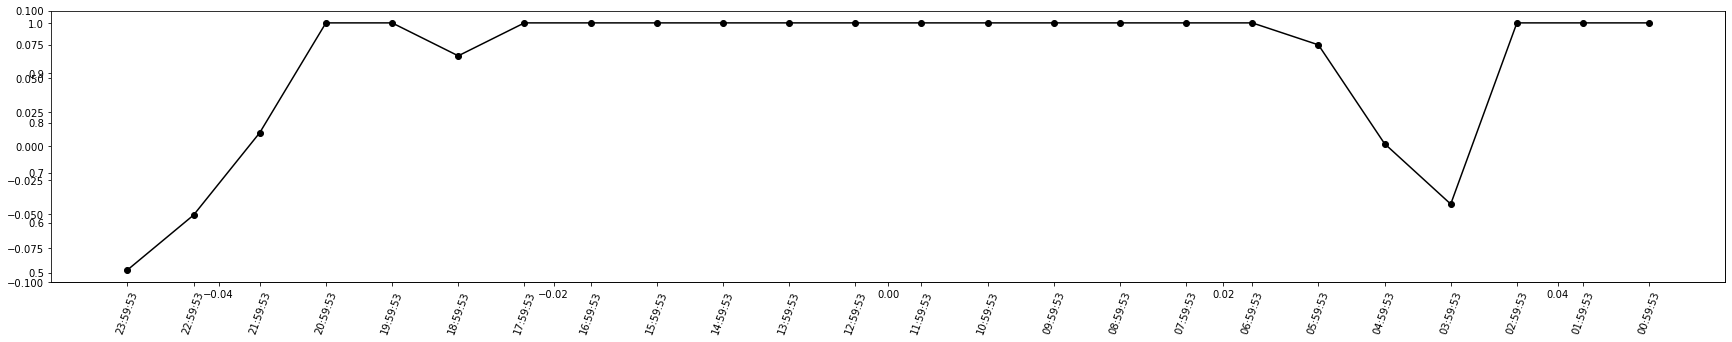

In [8]:
fig = plt.figure(figsize=(30,5))
ax = plt.axes(plt.margins(0, 0.5))
ax.tick_params(axis='x', rotation=70)

ax.plot(df1['time'], df1['usage'], '-ok')

In [6]:
def sample_data_loc(g, div, loc, g_on, loc_on):
    #with g being the dataframegroupby object
    index = np.round(np.linspace(0, len(g.count()), num=div, endpoint=False),decimals=0).astype(int)
    return [pd.merge(g.get_group(list(g.groups)[x]), loc, left_on=g_on, right_on=loc_on) for x in index]

In [7]:
def plot_usage_time(div, pal, al):
    g = df.groupby('time')
    row = math.ceil(div/4)
    col = 4
    pl = sample_data_loc(g, div, hdb, 'number', 'car_park_no')
    fig, ax = plt.subplots(row, col, figsize=(30, 5*row), sharex=True, sharey=True)

    for i in range(row):
        for k in range(col):
            ax[i, k].set_title(pl[i].time[0])
            sns.scatterplot(ax=ax[i, k], x='x_coord', y='y_coord', hue='usage', data=pl[col*i + k], alpha=al, palette=pal)

In [ ]:
plot_usage_time(24, 'flare', 0.5)